In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fuelconsumption/FuelConsumption_file.csv


In [2]:
data = pd.read_csv('/kaggle/input/fuelconsumption/FuelConsumption_file.csv')
data.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
d = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
d.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


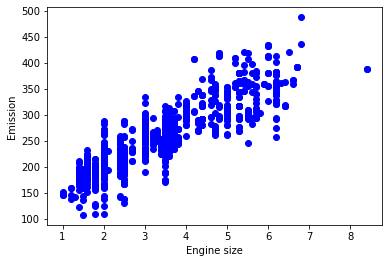

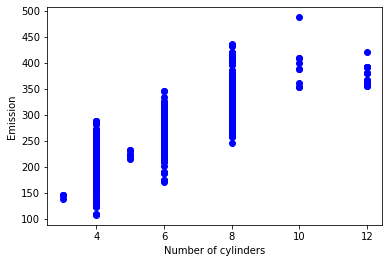

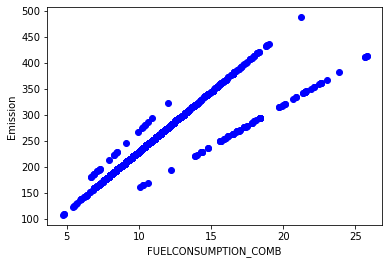

In [5]:
import matplotlib.pyplot as plt
plt.scatter(d.ENGINESIZE, d.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()
plt.scatter(d.CYLINDERS, d.CO2EMISSIONS,  color='blue')
plt.xlabel("Number of cylinders")
plt.ylabel("Emission")
plt.show()
plt.scatter(d.FUELCONSUMPTION_COMB, d.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [8]:
msk = np.random.rand(len(d)) < 0.8
train = d[msk]
test = d[~msk]

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [10]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [11]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [12]:
lm = linear_model.LinearRegression()
pred_y = lm.fit(train_x_poly,train_y)
print('coefficients:',lm.coef_)
print('intercept:',lm.intercept_)
print(pred_y)

coefficients: [[ 0.         51.17051447 -1.59656506]]
intercept: [105.91876587]
LinearRegression()


Text(0, 0.5, 'co2 emission')

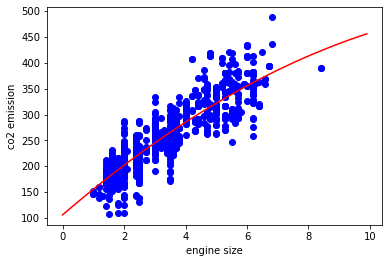

In [13]:
plt.scatter(d.ENGINESIZE,d.CO2EMISSIONS,color='blue')
xx = np.arange(0.0, 10.0, 0.1)
yy = lm.intercept_[0]+xx*lm.coef_[0][1]+ lm.coef_[0][2]*np.power(xx,2)
plt.plot(xx,yy,'-r')
plt.xlabel('engine size')
plt.ylabel('co2 emission')

In [14]:
test_x_poly = poly.fit_transform(test_x)
y_pred = lm.predict(test_x_poly)
y_pred

array([[201.87353458],
       [179.0822662 ],
       [265.45764457],
       [265.45764457],
       [219.53178587],
       [201.87353458],
       [245.06122377],
       [245.06122377],
       [245.06122377],
       [201.87353458],
       [245.06122377],
       [328.83432197],
       [292.67151904],
       [285.05578284],
       [285.05578284],
       [355.46551063],
       [201.87353458],
       [245.06122377],
       [245.06122377],
       [245.06122377],
       [245.06122377],
       [245.06122377],
       [245.06122377],
       [300.15953003],
       [300.15953003],
       [300.15953003],
       [245.06122377],
       [300.15953003],
       [300.15953003],
       [201.87353458],
       [269.44113482],
       [174.42821862],
       [269.44113482],
       [269.44113482],
       [201.87353458],
       [201.87353458],
       [201.87353458],
       [223.86652044],
       [269.44113482],
       [269.44113482],
       [361.80399479],
       [269.44113482],
       [361.80399479],
       [174

In [15]:
#rsquare value
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_pred , test_y) )

R2-score: 0.68


In [16]:
print("Mean absolute error:",np.mean(np.absolute(y_pred - test_y)))

Mean absolute error: 23.240462940072902


In [ ]:
print("Mean square error:",np.mean((y_pred - test_y)**2))